Final parameters: a=0.997333333849981, b=2.367999994270291


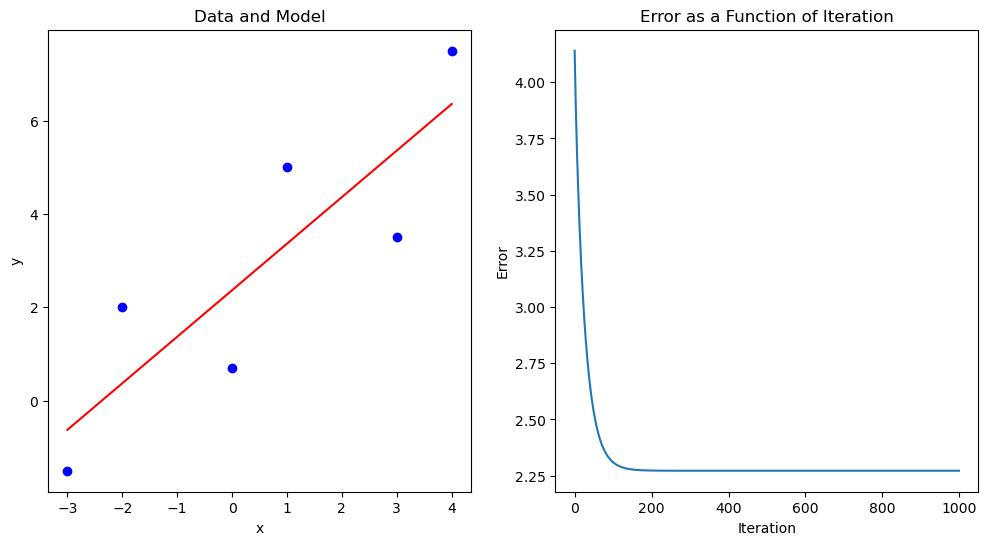

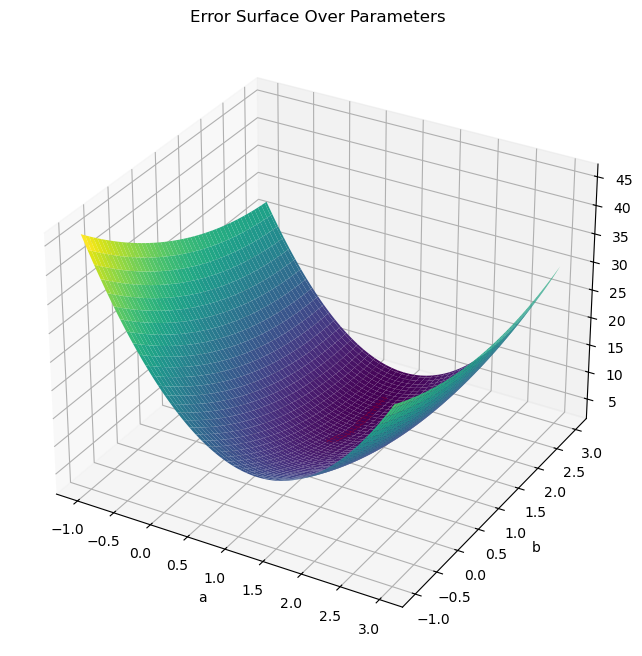

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
x = np.array([-3.0, -2.0, 0.0, 1.0, 3.0, 4.0])
y = np.array([-1.5, 2.0, 0.7, 5.0, 3.5, 7.5])

# Initial parameters
a, b = 1, 1

# Learning rate
lr = 0.01

# Number of iterations
iterations = 1000

# To store history of error
errors = []

# To store history of parameters
parameters = np.zeros((iterations, 2))

for i in range(iterations):
    # Calculate prediction
    y_pred = a * x + b

    # Calculate error
    error = y_pred - y
    errors.append((error**2).mean())

    # Calculate gradients
    a_grad = (2 * (error * x).mean())
    b_grad = (2 * error.mean())

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    parameters[i, :] = [a, b]

# Display results
print(f"Final parameters: a={a}, b={b}")

# Plot data and model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue')
plt.plot(x, a*x + b, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model')

# Plot error as a function of iteration
plt.subplot(1, 2, 2)
plt.plot(range(iterations), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error as a Function of Iteration')
plt.show()

# Plot error surface over parameters
a_values = np.linspace(-1, 3, 100)
b_values = np.linspace(-1, 3, 100)
A, B = np.meshgrid(a_values, b_values)

E = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        y_pred = A[i, j]*x + B[i, j]
        E[i, j] = ((y - y_pred)**2).mean()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, E, cmap='viridis')
ax.plot(parameters[:, 0], parameters[:, 1], errors, 'r.')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Error')
ax.set_title('Error Surface Over Parameters')
plt.show()


Final parameters: a=0.9973333333333335, b=2.367999999999998


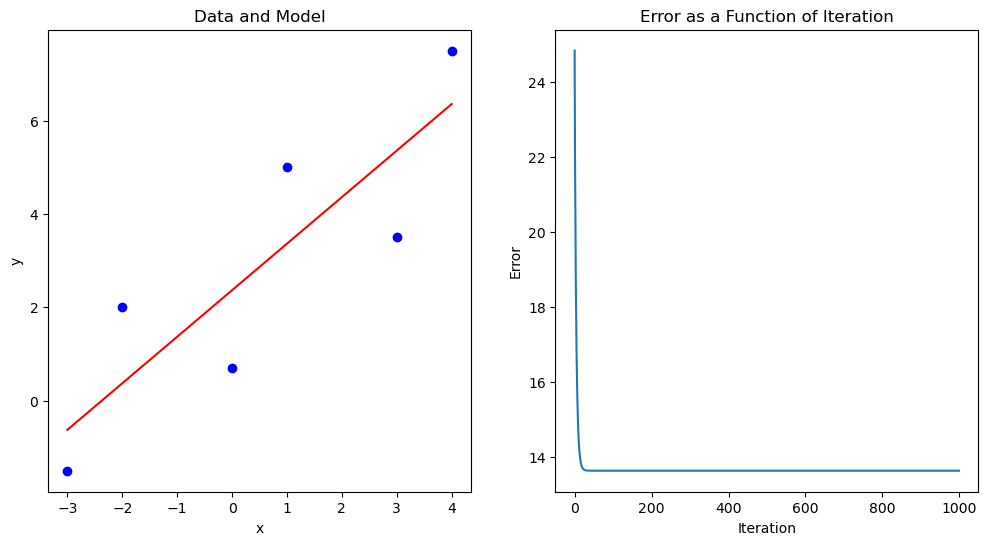

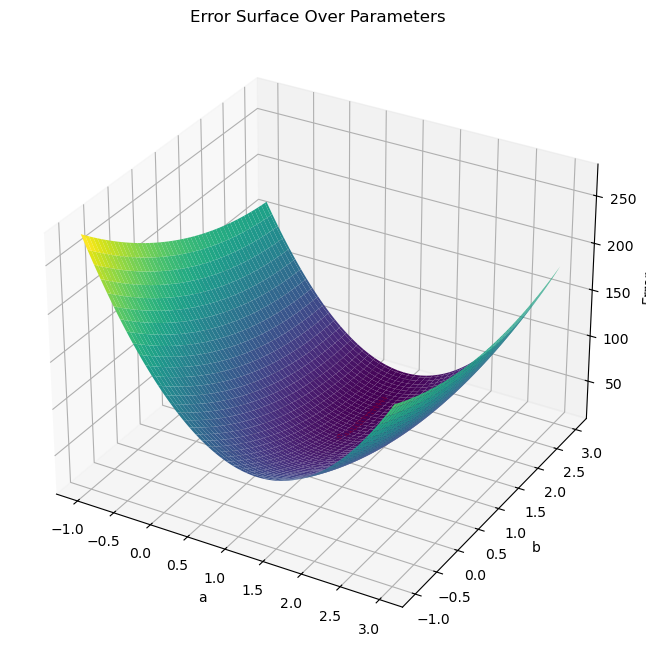

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, diff, lambdify

# Data
x_data = np.array([-3.0, -2.0, 0.0, 1.0, 3.0, 4.0])
y_data = np.array([-1.5, 2.0, 0.7, 5.0, 3.5, 7.5])

# Symbols
x, y, a, b = symbols('x,y,a,b')

# Model
f = a*x + b

# Error for a single data point
e = (y - f)**2

# Gradients
grad_a = diff(e, a)
grad_b = diff(e, b)

# Total error
E = sum(e.subs({x: x_val, y: y_val}) for x_val, y_val in zip(x_data, y_data))

# Gradients
grad_E_a = diff(E, a)
grad_E_b = diff(E, b)

# Lambdify
E_func = lambdify((a, b), E, 'numpy')
grad_E_a_func = lambdify((a, b), grad_E_a, 'numpy')
grad_E_b_func = lambdify((a, b), grad_E_b, 'numpy')

# Initial parameters
a_val, b_val = 1, 1

# Learning rate
lr = 0.01

# Number of iterations
iterations = 1000

# To store history of error
errors = []

# To store history of parameters
parameters = np.zeros((iterations, 2))

for i in range(iterations):
    # Calculate error
    error = E_func(a_val, b_val)
    errors.append(error)

    # Calculate gradients
    a_grad = grad_E_a_func(a_val, b_val)
    b_grad = grad_E_b_func(a_val, b_val)

    # Update parameters
    a_val -= lr * a_grad
    b_val -= lr * b_grad

    parameters[i, :] = [a_val, b_val]

# Display results
print(f"Final parameters: a={a_val}, b={b_val}")

# Plot data and model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, color='blue')
plt.plot(x_data, a_val*x_data + b_val, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model')

# Plot error as a function of iteration
plt.subplot(1, 2, 2)
plt.plot(range(iterations), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error as a Function of Iteration')
plt.show()

# Plot error surface over parameters
a_values = np.linspace(-1, 3, 100)
b_values = np.linspace(-1, 3, 100)
A, B = np.meshgrid(a_values, b_values)

E = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        E[i, j] = E_func(A[i, j], B[i, j])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, E, cmap='viridis')
ax.plot(parameters[:, 0], parameters[:, 1], errors, 'r.')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Error')
ax.set_title('Error Surface Over Parameters')
plt.show()


Final parameters: a=0.4946555998532448, b=3.0123813348953465


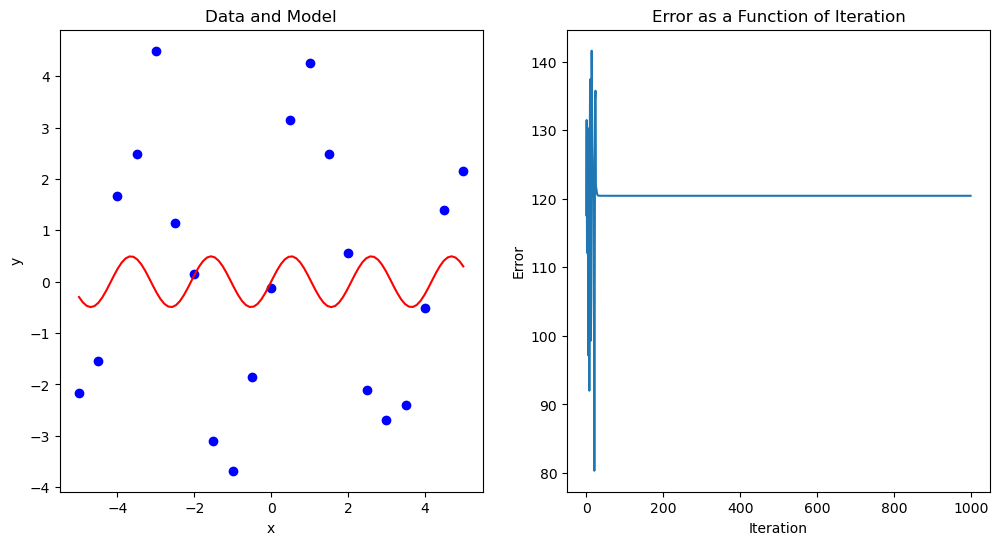

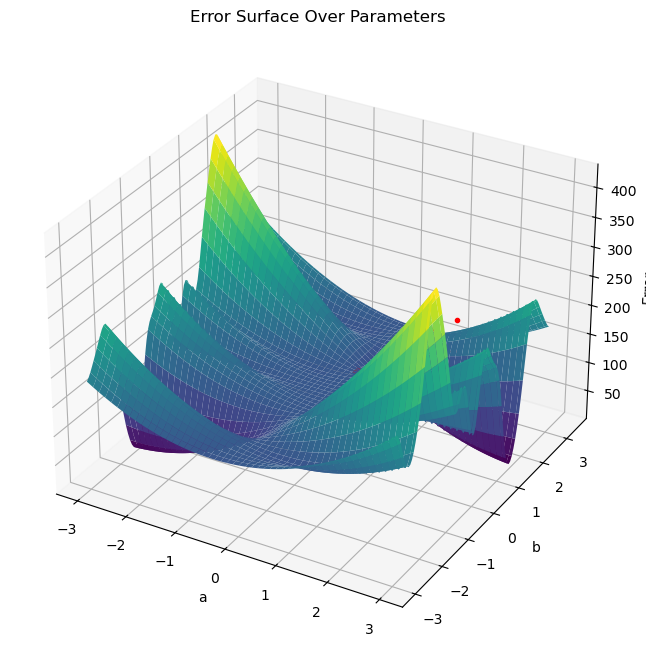

In [3]:
from sympy import sin

# Data
x_data = np.array([-5., -4.5, -4., -3.5, -3., -2.5, -2., -1.5, -1., -0.5, 0.,
                   0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5. ])
y_data = np.array([-2.16498306, -1.53726731, 1.67075645, 2.47647932, 4.49579917,
                   1.14600963, 0.15938811, -3.09848048, -3.67902427, -1.84892687,
                   -0.11705947, 3.14778203, 4.26365256, 2.49120585, 0.55300516,
                   -2.105836 , -2.68898773, -2.39982575, -0.50261972, 1.40235643,
                   2.15371399])

# Model
f = a * sin(b * x)

# Error for a single data point
e = (y - f)**2

# Gradients
grad_a = diff(e, a)
grad_b = diff(e, b)

# Total error
E = sum(e.subs({x: x_val, y: y_val}) for x_val, y_val in zip(x_data, y_data))

# Gradients
grad_E_a = diff(E, a)
grad_E_b = diff(E, b)

# Lambdify
E_func = lambdify((a, b), E, 'numpy')
grad_E_a_func = lambdify((a, b), grad_E_a, 'numpy')
grad_E_b_func = lambdify((a, b), grad_E_b, 'numpy')

# Initial parameters
a_val, b_val = 1, 1  # You might need to adjust these initial values

# Learning rate
lr = 0.01  # You might need to adjust the learning rate

# Number of iterations
iterations = 1000

# To store history of error
errors = []

# To store history of parameters
parameters = np.zeros((iterations, 2))

for i in range(iterations):
    # Calculate error
    error = E_func(a_val, b_val)
    errors.append(error)

    # Calculate gradients
    a_grad = grad_E_a_func(a_val, b_val)
    b_grad = grad_E_b_func(a_val, b_val)

    # Update parameters
    a_val -= lr * a_grad
    b_val -= lr * b_grad

    parameters[i, :] = [a_val, b_val]

# Display results
print(f"Final parameters: a={a_val}, b={b_val}")

# Plot data and model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, color='blue')
plt.plot(np.linspace(-5, 5, 100), a_val*np.sin(b_val*np.linspace(-5, 5, 100)), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model')

# Plot error as a function of iteration
plt.subplot(1, 2, 2)
plt.plot(range(iterations), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error as a Function of Iteration')
plt.show()

# Plot error surface over parameters
a_values = np.linspace(-3, 3, 100)
b_values = np.linspace(-3, 3, 100)
A, B = np.meshgrid(a_values, b_values)

E = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        E[i, j] = E_func(A[i, j], B[i, j])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, E, cmap='viridis')
ax.plot(parameters[:, 0], parameters[:, 1], errors, 'r.')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Error')
ax.set_title('Error Surface Over Parameters')
plt.show()
